In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df['date']=pd.to_datetime(df['date'])
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df['month']=df['date'].dt.month
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [7]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [8]:
seasons={1:'Winter',
              2:'Winter',
              3:'Spring',
              4:'Spring',
              5:'Spring',
              6:'Summer',
              7:'Summer',
              8:'Summer',
              9:'Autumn',
              10:'Autumn',
              11:'Autumn',
              12:'Winter'}

df['season']=df['month'].map(seasons)
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,month,season
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,Winter
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,Winter
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,Winter
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,Winter
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,Winter


In [9]:
df.drop(columns=['date','month'],axis=1,inplace=True)
df.head()

,precipitation,temp_max,temp_min,wind,weather,season
0,0.0,12.8,5.0,4.7,drizzle,Winter
1,10.9,10.6,2.8,4.5,rain,Winter
2,0.8,11.7,7.2,2.3,rain,Winter
3,20.3,12.2,5.6,4.7,rain,Winter
4,1.3,8.9,2.8,6.1,rain,Winter


In [10]:
df['season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [11]:
df = pd.get_dummies(df, columns=['season'])
df

,precipitation,temp_max,temp_min,wind,weather,season_Autumn,season_Spring,season_Summer,season_Winter
0,0.0,12.8,5.0,4.7,drizzle,False,False,False,True
1,10.9,10.6,2.8,4.5,rain,False,False,False,True
2,0.8,11.7,7.2,2.3,rain,False,False,False,True
3,20.3,12.2,5.6,4.7,rain,False,False,False,True
4,1.3,8.9,2.8,6.1,rain,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,False,False,False,True
1457,1.5,5.0,1.7,1.3,rain,False,False,False,True
1458,0.0,7.2,0.6,2.6,fog,False,False,False,True
1459,0.0,5.6,-1.0,3.4,sun,False,False,False,True


In [12]:
cols=['season_Autumn','season_Spring','season_Summer','season_Winter']
for i in cols:
    df[i].replace({True:1,False:0},inplace=True)
df

,precipitation,temp_max,temp_min,wind,weather,season_Autumn,season_Spring,season_Summer,season_Winter
0,0.0,12.8,5.0,4.7,drizzle,0,0,0,1
1,10.9,10.6,2.8,4.5,rain,0,0,0,1
2,0.8,11.7,7.2,2.3,rain,0,0,0,1
3,20.3,12.2,5.6,4.7,rain,0,0,0,1
4,1.3,8.9,2.8,6.1,rain,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,0,0,0,1
1457,1.5,5.0,1.7,1.3,rain,0,0,0,1
1458,0.0,7.2,0.6,2.6,fog,0,0,0,1
1459,0.0,5.6,-1.0,3.4,sun,0,0,0,1


In [13]:
df.describe()

,precipitation,temp_max,temp_min,wind,season_Autumn,season_Spring,season_Summer,season_Winter
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,0.249144,0.251882,0.251882,0.247091
std,6.680194,7.349758,5.023004,1.437825,0.432666,0.434243,0.434243,0.431468
min,0.000000,-1.600000,-7.100000,0.400000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.600000,4.400000,2.200000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.600000,8.300000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,2.800000,22.200000,12.200000,4.000000,0.000000,1.000000,1.000000,0.000000
max,55.900000,35.600000,18.300000,9.500000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   season_Autumn  1461 non-null   int64  
 6   season_Spring  1461 non-null   int64  
 7   season_Summer  1461 non-null   int64  
 8   season_Winter  1461 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 102.9+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['weather_label'] = le.fit_transform(df['weather'])
df.head()

,precipitation,temp_max,temp_min,wind,weather,season_Autumn,season_Spring,season_Summer,season_Winter,weather_label
0,0.0,12.8,5.0,4.7,drizzle,0,0,0,1,0
1,10.9,10.6,2.8,4.5,rain,0,0,0,1,2
2,0.8,11.7,7.2,2.3,rain,0,0,0,1,2
3,20.3,12.2,5.6,4.7,rain,0,0,0,1,2
4,1.3,8.9,2.8,6.1,rain,0,0,0,1,2


In [16]:
weather_keys = dict(zip(df['weather_label'], df['weather']))
weather_keys

{0: 'drizzle', 2: 'rain', 4: 'sun', 3: 'snow', 1: 'fog'}

In [17]:
df_final = df.drop(['weather'],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['weather_label'], axis = 1)
y = df_final['weather_label']

In [19]:
X.head()

,precipitation,temp_max,temp_min,wind,season_Autumn,season_Spring,season_Summer,season_Winter
0,0.0,12.8,5.0,4.7,0,0,0,1
1,10.9,10.6,2.8,4.5,0,0,0,1
2,0.8,11.7,7.2,2.3,0,0,0,1
3,20.3,12.2,5.6,4.7,0,0,0,1
4,1.3,8.9,2.8,6.1,0,0,0,1


In [20]:
y.head()

0    0
1    2
2    2
3    2
4    2
Name: weather_label, dtype: int32

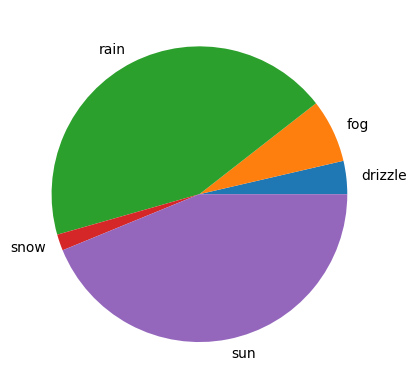

In [21]:
import matplotlib.pyplot as plt
plt.pie(df_final['weather_label'].groupby(df_final['weather_label']).count(),labels=['drizzle', 'fog', 'rain', 'snow', 'sun'])
plt.show()

In [22]:
df_final['weather_label'].groupby(df_final['weather_label']).count()

weather_label
0     53
1    101
2    641
3     26
4    640
Name: weather_label, dtype: int64

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10, test_size = 0.2)

In [24]:
from sklearn.tree import DecisionTreeClassifier
temp=['gini', 'entropy', 'log_loss']
for i in temp:
    classifier_dtc=DecisionTreeClassifier(criterion=i)
    classifier_dtc.fit(X_train,y_train)

    y_pred2 = classifier_dtc.predict(X_test)
    print('Score ',i,' => ', classifier_dtc.score(X_test,y_test))

Score  gini  =>  0.764505119453925
Score  entropy  =>  0.7713310580204779
Score  log_loss  =>  0.7781569965870307


In [25]:
from sklearn.ensemble import RandomForestClassifier
temp=['gini', 'entropy', 'log_loss']
for i in temp:
    classifier_rfc=RandomForestClassifier(criterion=i)
    classifier_rfc.fit(X_train,y_train)

    y_pred2 = classifier_rfc.predict(X_test)
    print('Score ',i,' => ', classifier_rfc.score(X_test,y_test))

Score  gini  =>  0.8532423208191127
Score  entropy  =>  0.856655290102389
Score  log_loss  =>  0.8532423208191127


In [26]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=[3,5,7,9,11,13,15,17,19]
weights=['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
for i in n_neighbors:
    for j in weights:
        for k in algorithm:
            classifier_knc=KNeighborsClassifier(n_neighbors=i,weights=j,algorithm=k)
            classifier_knc.fit(X_train,y_train)

            y_pred2 = classifier_knc.predict(X_test)
            print('Score ',i,j,k,' => ', classifier_knc.score(X_test,y_test))

Score  3 uniform auto  =>  0.7440273037542662
Score  3 uniform ball_tree  =>  0.7440273037542662
Score  3 uniform kd_tree  =>  0.7440273037542662
Score  3 uniform brute  =>  0.7440273037542662
Score  3 distance auto  =>  0.7440273037542662
Score  3 distance ball_tree  =>  0.7406143344709898
Score  3 distance kd_tree  =>  0.7440273037542662
Score  3 distance brute  =>  0.7406143344709898
Score  5 uniform auto  =>  0.7747440273037542
Score  5 uniform ball_tree  =>  0.7747440273037542
Score  5 uniform kd_tree  =>  0.7747440273037542
Score  5 uniform brute  =>  0.7747440273037542
Score  5 distance auto  =>  0.78839590443686
Score  5 distance ball_tree  =>  0.78839590443686
Score  5 distance kd_tree  =>  0.78839590443686
Score  5 distance brute  =>  0.78839590443686
Score  7 uniform auto  =>  0.7918088737201365
Score  7 uniform ball_tree  =>  0.7918088737201365
Score  7 uniform kd_tree  =>  0.7918088737201365
Score  7 uniform brute  =>  0.7952218430034129
Score  7 distance auto  =>  0.79180

So, we got best result with RandomForestClassifier with criterion=entropy with score = 0.8668941979522184

In [27]:
classifier_rfc=RandomForestClassifier(criterion='entropy')
classifier_rfc.fit(X_train,y_train)
classifier_rfc.score(X_test,y_test)

0.863481228668942

In [28]:
import joblib
joblib.dump(classifier_rfc,'model_save')
joblib.dump(X_train,'train_df_save')

['train_df_save']

In [31]:
X_train.head(1)
y_train.head(1)

339    2
Name: weather_label, dtype: int32

In [33]:
columns=X_train.columns
np_arr=np.array([[1.5,8.9,4.4,5.0,0,0,0,1]])
prediction=pd.DataFrame(np_arr,columns=columns)
classifier_rfc.predict(prediction)[0]

2